### Apple stocks Price EDA and Predictions

## Data gotten from https://www.kaggle.com/datasets/varpit94/apple-stock-data-updated-till-22jun2021

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
pd.set_option('display.max_columns', None)

from scipy import stats

#Import Required sklearn libraries
from sklearn import preprocessing
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error,mean_squared_error,roc_auc_score,roc_curve

sns.set()

In [11]:
df = pd.read_csv(r'AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB


In [13]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [14]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,10409,10409.000000,10409.000000,10409.000000,10409.000000,10409.000000,1.040900e+04
mean,2001-07-26 11:23:49.416850816,13.959910,14.111936,13.809163,13.966757,13.350337,3.321778e+08
min,1980-12-12 00:00:00,0.049665,0.049665,0.049107,0.049107,0.038384,0.000000e+00
25%,1991-04-01 00:00:00,0.281964,0.287946,0.274554,0.281250,0.234799,1.247604e+08
50%,2001-07-18 00:00:00,0.468750,0.477679,0.459821,0.468750,0.386853,2.199680e+08
75%,2011-11-18 00:00:00,14.217857,14.364286,14.043571,14.206071,12.188149,4.126108e+08
max,2022-03-24 00:00:00,182.630005,182.940002,179.119995,182.009995,181.778397,7.421641e+09
std,NaN,30.169244,30.514878,29.835055,30.191696,29.911132,3.393344e+08


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

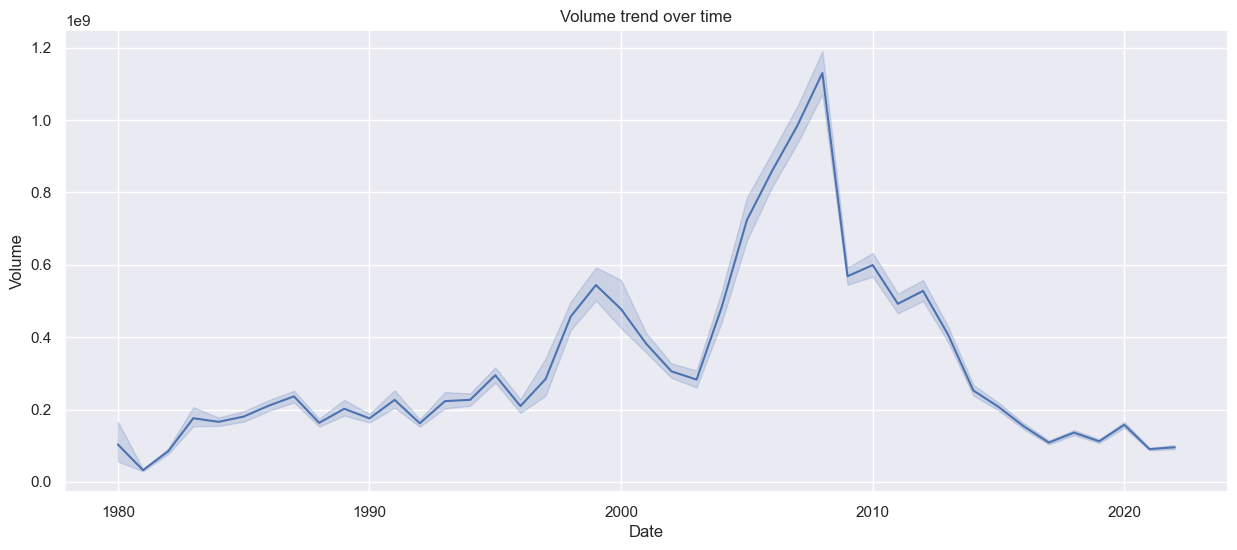

In [17]:
plt.figure(figsize=(15, 6))
sns.lineplot(y = df['Volume'], x= df['Date'].dt.year)
plt.title("Volume trend over time")

plt.plot()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

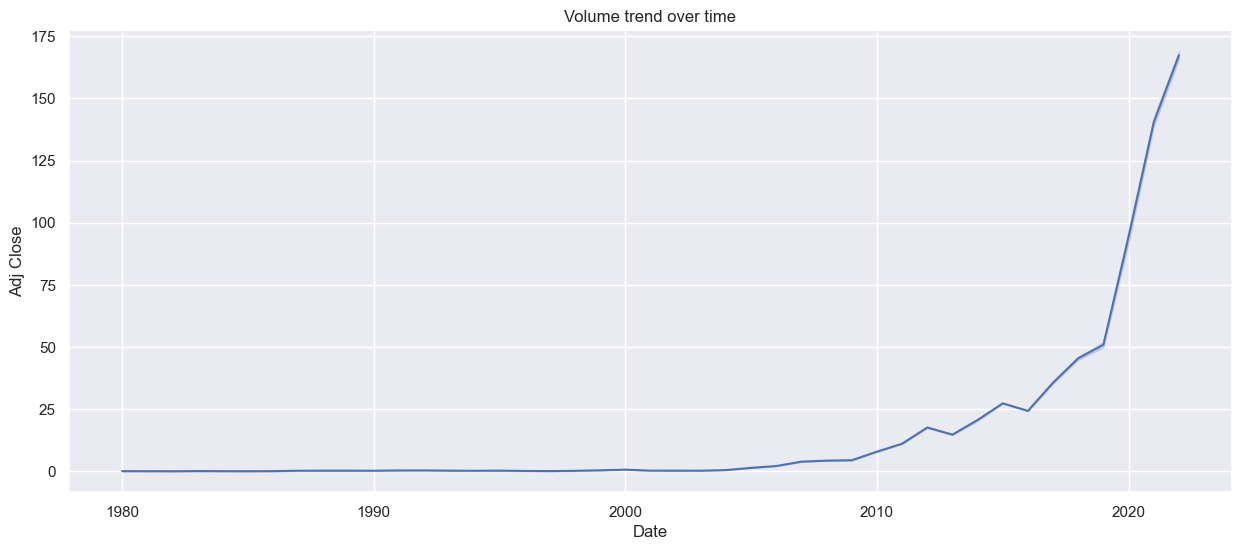

In [18]:
plt.figure(figsize=(15, 6))
sns.lineplot(y = df['Adj Close'], x= df['Date'].dt.year)
plt.title("Volume trend over time")

plt.plot()

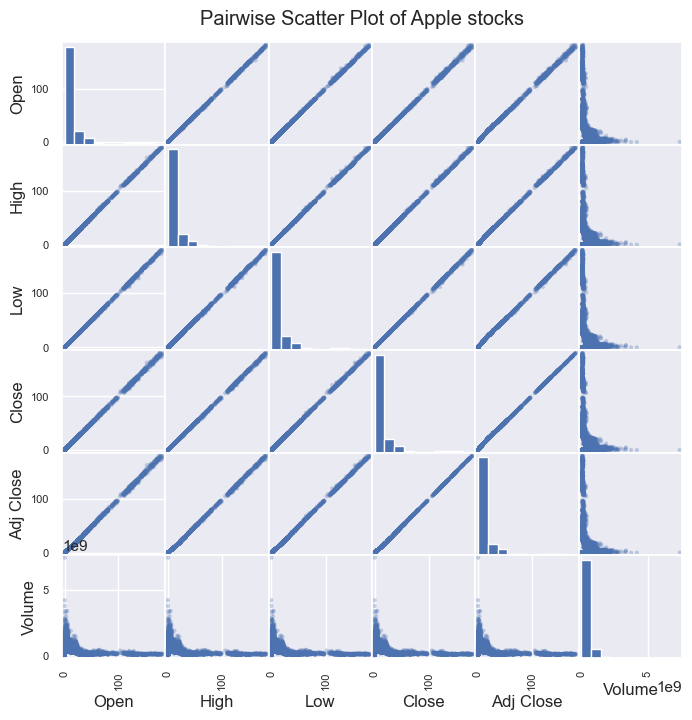

In [19]:
pd.plotting.scatter_matrix(df, figsize=(8,8), alpha=0.3)
plt.suptitle(f'Pairwise Scatter Plot of Apple stocks', x=0.5, y=0.92)
plt.show()